In [49]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as py
%matplotlib inline
# Settings for seaborn
sns.set_theme(style="ticks", palette="pastel")

In [50]:
# Read file into dataframe
df_tweets = pd.read_csv('../05_Feature Selection & Engineering/dataset_tweets_featured.csv', sep=',', encoding='utf-8')
print(df_tweets.shape)
df_tweets.head(5)

(64344, 22)


,interaction_id,tweet_id,senderuser_id,receiveruser_id,cyberbullying_type,interaction_timestamp,char_count,tweet_text,harass,cyberstalk,...,doxing,exclusion,impersonation,trolling,hateSpeech,threats,word_count,avg_word_length,avg_sentence_length,punctuation_count
0,1304,1510,876,2009,not_cyberbullying,41:34.9,20,@GYU WHAT IS THAT,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,2.800000,5.0,1
1,1998,31503,918,2436,other_cyberbullying,37:48.7,16,@STOCKPUTOUT YES,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,5.000000,3.0,1
2,2533,27942,1409,3624,other_cyberbullying,50:46.1,7,,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0
3,2598,52129,1341,3290,none,04:51.4,26,@BLACKAMAZON EXACTLY THIS,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,5.750000,4.0,1
4,3511,54626,831,2812,none,11:11.2,34,@ODDTANKOUT HTTP T CO KMMJEUME,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,4.333333,6.0,1


Drop the Column 'tweet_text' and 'interaction_timestamp'

In [51]:
df_tweets = df_tweets.drop(columns=['tweet_text', 'interaction_timestamp'])
df_tweets.head(5)

,interaction_id,tweet_id,senderuser_id,receiveruser_id,cyberbullying_type,char_count,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats,word_count,avg_word_length,avg_sentence_length,punctuation_count
0,1304,1510,876,2009,not_cyberbullying,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2.800000,5.0,1
1,1998,31503,918,2436,other_cyberbullying,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,5.000000,3.0,1
2,2533,27942,1409,3624,other_cyberbullying,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0
3,2598,52129,1341,3290,none,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,5.750000,4.0,1
4,3511,54626,831,2812,none,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4.333333,6.0,1


Second DataFrame without 'interaction_id', 'tweet_id', 'senderuser_id', 'receiveruser_id' and 'cyberbullying_type'

In [52]:
df_tweets_numbers = df_tweets.drop(columns=['interaction_id', 'tweet_id', 'senderuser_id', 'receiveruser_id', 'cyberbullying_type'])
df_tweets_numbers.head(5)

,char_count,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats,word_count,avg_word_length,avg_sentence_length,punctuation_count
0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2.800000,5.0,1
1,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,5.000000,3.0,1
2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0
3,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,5.750000,4.0,1
4,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4.333333,6.0,1


# Data Cleaning and Preparation
This step is in the File Folder "04_Data Cleansing".

# Declaration of the data

In [53]:
df_tweets.shape

(64344, 20)

In [54]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64344 entries, 0 to 64343
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   interaction_id       64344 non-null  int64  
 1   tweet_id             64344 non-null  int64  
 2   senderuser_id        64344 non-null  int64  
 3   receiveruser_id      64344 non-null  int64  
 4   cyberbullying_type   64342 non-null  object 
 5   char_count           64344 non-null  int64  
 6   harass               64343 non-null  float64
 7   cyberstalk           64343 non-null  float64
 8   flaming              64343 non-null  float64
 9   outing               64343 non-null  float64
 10  doxing               64343 non-null  float64
 11  exclusion            64343 non-null  float64
 12  impersonation        64343 non-null  float64
 13  trolling             64343 non-null  float64
 14  hateSpeech           64343 non-null  float64
 15  threats              64343 non-null 

# Non Graphical Univariate EDA

### Summary statistics of numeric variables

In [55]:
df_tweets_numbers.describe()

,char_count,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats,word_count,avg_word_length,avg_sentence_length,punctuation_count
count,64344.000000,64343.000000,64343.000000,64343.000000,64343.000000,64343.00000,64343.00000,64343.000000,64343.000000,64343.000000,64343.000000,64344.000000,64344.000000,64344.000000,64344.000000
mean,125.610702,0.051055,0.035559,0.009558,0.008439,0.01736,0.00373,0.009931,0.015604,0.107082,0.024944,22.321755,4.300458,23.597258,1.101284
std,77.695510,0.220111,0.185190,0.097298,0.091477,0.13061,0.06096,0.099160,0.123938,0.309220,0.155957,14.376101,0.878205,14.901842,1.530611
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,13.000000,3.833333,14.000000,0.000000
50%,117.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,4.214286,21.000000,1.000000
75%,140.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,27.000000,4.666667,28.000000,2.000000
max,4962.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,864.000000,86.000000,918.000000,69.000000


### Quantiles
As the colums only have the value 0 or 1, the Quantiles are set accordingly.

In [56]:
df_tweets_numbers.quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95], axis=0, numeric_only=True).round(2)

,char_count,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats,word_count,avg_word_length,avg_sentence_length,punctuation_count
0.05,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.33,6.0,0.0
0.10,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.52,8.0,0.0
0.25,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,3.83,14.0,0.0
0.50,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,4.21,21.0,1.0
0.75,140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,4.67,28.0,2.0
0.90,256.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,45.0,5.15,47.0,3.0
0.95,275.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,50.0,5.50,52.0,4.0


### Measures of dispersion

In [57]:
df_tweets_numbers.var()

char_count             6036.592286
harass                    0.048449
cyberstalk                0.034295
flaming                   0.009467
outing                    0.008368
doxing                    0.017059
exclusion                 0.003716
impersonation             0.009833
trolling                  0.015361
hateSpeech                0.095617
threats                   0.024323
word_count              206.672267
avg_word_length           0.771244
avg_sentence_length     222.064892
punctuation_count         2.342771
dtype: float64

In [58]:
df_tweets_numbers.std()

char_count             77.695510
harass                  0.220111
cyberstalk              0.185190
flaming                 0.097298
outing                  0.091477
doxing                  0.130610
exclusion               0.060960
impersonation           0.099160
trolling                0.123938
hateSpeech              0.309220
threats                 0.155957
word_count             14.376101
avg_word_length         0.878205
avg_sentence_length    14.901842
punctuation_count       1.530611
dtype: float64

### Skewness

In [59]:
df_tweets_numbers.skew()

char_count              8.250484
harass                  4.079398
cyberstalk              5.015973
flaming                10.081525
outing                 10.747525
doxing                  7.390779
exclusion              16.282258
impersonation           9.884728
trolling                7.816991
hateSpeech              2.541423
threats                 6.092324
word_count              7.119532
avg_word_length        19.393686
avg_sentence_length     7.682119
punctuation_count       4.722121
dtype: float64

The skewness of the values are <0, which means they're right-skewed.

### Kurtosis

In [60]:
df_tweets_numbers.kurtosis()

char_count              392.905431
harass                   14.641943
cyberstalk               23.160704
flaming                  99.640251
outing                  113.512821
doxing                   52.625251
exclusion               263.120117
impersonation            95.710832
trolling                 59.107191
hateSpeech                4.458971
threats                  35.117501
word_count              311.097876
avg_word_length        1378.487562
avg_sentence_length     348.406652
punctuation_count       112.224503
dtype: float64

The kurtosis values are all pretty high, which means they have a high peak.

### Extreme values
Because the fields only have the values 0 or 1, there are no extreme values.

In [61]:
for column in df_tweets.columns:
    # Get unique values in the current column
    unique_values = df_tweets[column].unique()
    
    # Print the column name and its unique values
    print(f"Unique values in '{column}' column:{unique_values}\n")

Unique values in 'interaction_id' column:[ 1304  1998  2533 ... 64343 64344 64345]

Unique values in 'tweet_id' column:[ 1510 31503 27942 ...  1749 17969 31440]

Unique values in 'senderuser_id' column:[ 876  918 1409 ...  948 1830 2444]

Unique values in 'receiveruser_id' column:[2009 2436 3624 ...  678 3193 1708]

Unique values in 'cyberbullying_type' column:['not_cyberbullying' 'other_cyberbullying' 'none' 'gender' 'sexism' 'age'
 'ethnicity' 'religion' 'racism' nan]

Unique values in 'char_count' column:[  20   16    7   26   34    4   24   22    9   14   18   19   30   10
   25   27    3    5   32   17   15   31   35   37   42   46   33   23
   55   47   21   36   52   44   62   12   56   57   40   28   39   11
   48   50    6   41   13   38   49   29   45   51   43   54    2   61
   67    8   58  139  144  132  122   89   71  266  140  118  113  102
  109  168  166  133  267  130  261  269  100  115  213  127   97  125
  276  158  275  215  107   79  120   95  108  138  106  112 

# Non Graphical Multivariate EDA

### Cross-tabulation

In [62]:
pd.crosstab(df_tweets['harass'], df_tweets['cyberbullying_type'])

cyberbullying_type,age,ethnicity,gender,none,not_cyberbullying,other_cyberbullying,racism,religion,sexism
harass,,,,,,,,,
0.0,7289,7810,7445,11186,7100,7384,1908,7609,3326
1.0,671,132,501,272,823,413,57,373,43


### Pivot Tables

In [63]:
pd.pivot_table(df_tweets[['cyberbullying_type', 'harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats', 'word_count', 'char_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_count']],
               index=['cyberbullying_type'],
               values=['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats', 'word_count', 'char_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_count'],
               aggfunc=np.mean)

/var/folders/y8/blsng9yn0_jdwkc6k9fx0f240000gn/T/ipykernel_24966/2468566871.py:1: FutureWarning: The provided callable <function mean at 0x1047c8400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df_tweets[['cyberbullying_type', 'harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats', 'word_count', 'char_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_count']],


,avg_sentence_length,avg_word_length,char_count,cyberstalk,doxing,exclusion,flaming,harass,hateSpeech,impersonation,outing,punctuation_count,threats,trolling,word_count
cyberbullying_type,,,,,,,,,,,,,,,
age,34.133166,4.083576,173.417211,0.040829,0.016960,0.008920,0.008040,0.084296,0.062060,0.013693,0.012312,0.392839,0.029523,0.012563,32.761055
ethnicity,27.122010,4.099698,139.373583,0.032360,0.011584,0.002770,0.012339,0.016620,0.124780,0.007681,0.005162,1.215689,0.011710,0.009821,25.525308
gender,26.104329,4.197657,136.404984,0.035238,0.014221,0.004027,0.027183,0.063051,0.257110,0.011075,0.005286,0.991946,0.036622,0.026932,24.691417
none,16.367865,4.369183,89.287136,0.028626,0.018677,0.002007,0.004451,0.023739,0.039448,0.004015,0.008815,1.276837,0.020859,0.017542,15.245942
not_cyberbullying,15.367790,4.381787,83.126215,0.030039,0.013126,0.002019,0.003029,0.103875,0.029156,0.002398,0.006311,1.162817,0.013631,0.012495,14.394800
other_cyberbullying,16.122355,4.304006,85.733231,0.030653,0.021547,0.001539,0.003976,0.052969,0.039118,0.004104,0.010645,1.243683,0.012825,0.021932,15.099141
racism,20.854453,4.760560,121.397455,0.052417,0.020356,0.002545,0.007634,0.029008,0.115522,0.019847,0.007125,2.196947,0.053944,0.009669,18.927735
religion,35.590955,4.523358,197.974944,0.051366,0.027437,0.006264,0.011902,0.046730,0.101102,0.027186,0.013029,0.922451,0.049486,0.009396,34.248183
sexism,18.916592,4.300020,101.558326,0.032057,0.009498,0.002671,0.006233,0.012763,0.397744,0.008311,0.002968,1.476996,0.011279,0.013951,17.671713


### Correlation Matrix

In [64]:
df_tweets_numbers.corr()

,char_count,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats,word_count,avg_word_length,avg_sentence_length,punctuation_count
char_count,1.000000,0.119998,0.081928,0.083724,0.054582,0.080115,0.070929,0.074080,0.058859,0.125489,0.111417,0.977437,-0.014849,0.978801,0.105931
harass,0.119998,1.000000,0.013035,0.053413,0.004074,0.021069,0.013606,0.006677,0.047139,-0.007025,0.139926,0.110797,0.035139,0.108143,0.004116
cyberstalk,0.081928,0.013035,1.000000,-0.001612,0.007056,0.003393,0.015785,0.012930,0.007651,0.017640,0.009109,0.073627,0.017312,0.074220,0.027373
flaming,0.083724,0.053413,-0.001612,1.000000,-0.003824,0.001619,0.001850,0.007881,0.227355,0.083243,0.010917,0.081489,0.002611,0.081343,-0.012555
outing,0.054582,0.004074,0.007056,-0.003824,1.000000,0.493756,0.013865,0.009608,0.002093,-0.010520,0.010300,0.049142,0.011907,0.049351,0.001331
doxing,0.080115,0.021069,0.003393,0.001619,0.493756,1.000000,-0.000325,0.052690,0.000548,-0.008701,0.010787,0.071891,0.022470,0.072750,0.016858
exclusion,0.070929,0.013606,0.015785,0.001850,0.013865,-0.000325,1.000000,0.004156,0.004639,0.004370,0.014735,0.064921,0.012824,0.065452,0.009942
impersonation,0.074080,0.006677,0.012930,0.007881,0.009608,0.052690,0.004156,1.000000,0.002566,0.001812,0.004081,0.071742,0.006860,0.069315,-0.011032
trolling,0.058859,0.047139,0.007651,0.227355,0.002093,0.000548,0.004639,0.002566,1.000000,0.054135,0.009613,0.053503,0.016100,0.054371,0.016410
hateSpeech,0.125489,-0.007025,0.017640,0.083243,-0.010520,-0.008701,0.004370,0.001812,0.054135,1.000000,0.010033,0.125500,-0.018377,0.127611,0.043117


### Covariance Matrix

In [65]:
df_tweets_numbers.cov()

,char_count,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats,word_count,avg_word_length,avg_sentence_length,punctuation_count
char_count,6036.592286,2.052135,1.178799,0.632918,0.387932,0.812979,0.335939,0.570724,0.566767,3.014841,1.350047,1091.756751,-1.013208,1133.261905,12.597440
harass,2.052135,0.048449,0.000531,0.001144,0.000082,0.000606,0.000183,0.000146,0.001286,-0.000478,0.004803,0.350594,0.006791,0.354711,0.001387
cyberstalk,1.178799,0.000531,0.034295,-0.000029,0.000120,0.000082,0.000178,0.000237,0.000176,0.001010,0.000263,0.196016,0.002815,0.204822,0.007759
flaming,0.632918,0.001144,-0.000029,0.009467,-0.000034,0.000021,0.000011,0.000076,0.002742,0.002504,0.000166,0.113983,0.000223,0.117939,-0.001870
outing,0.387932,0.000082,0.000120,-0.000034,0.008368,0.005899,0.000077,0.000087,0.000024,-0.000298,0.000147,0.064625,0.000956,0.067273,0.000186
doxing,0.812979,0.000606,0.000082,0.000021,0.005899,0.017059,-0.000003,0.000682,0.000009,-0.000351,0.000220,0.134985,0.002577,0.141594,0.003370
exclusion,0.335939,0.000183,0.000178,0.000011,0.000077,-0.000003,0.003716,0.000025,0.000035,0.000082,0.000140,0.056894,0.000686,0.059457,0.000928
impersonation,0.570724,0.000146,0.000237,0.000076,0.000087,0.000682,0.000025,0.009833,0.000032,0.000056,0.000063,0.102269,0.000597,0.102423,-0.001674
trolling,0.566767,0.001286,0.000176,0.002742,0.000024,0.000009,0.000035,0.000032,0.015361,0.002075,0.000186,0.095328,0.001752,0.100416,0.003113
hateSpeech,3.014841,-0.000478,0.001010,0.002504,-0.000298,-0.000351,0.000082,0.000056,0.002075,0.095617,0.000484,0.557891,-0.004989,0.588020,0.020407


# Graphical Univariate EDA
Most Graphics like Line, Histograms, Density Plots, QQ-Plots or Barcharts don't make sense for the Features, that have the values 0 or 1.

### Density Plot (seaborn)

/var/folders/y8/blsng9yn0_jdwkc6k9fx0f240000gn/T/ipykernel_24966/2867621485.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tweets['word_count'],
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN bef

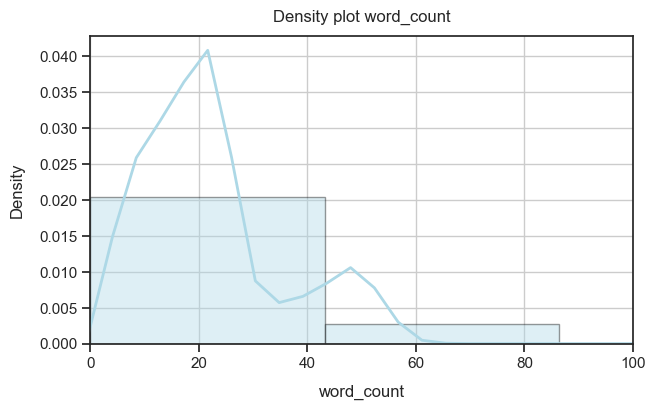

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
sns.distplot(df_tweets['word_count'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color='lightblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 2},
            )

plt.title('Density plot word_count', fontsize=12, pad=10)
plt.xlabel('word_count', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)

# Limit x-axis to 100
plt.xlim(0, 100)

plt.grid(True)
plt.show()


### Boxplot (seaborn)
For the Features word_count, char_count, avg_word_length, avg_sentence_length and punctuation_count

/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='punctuation_count'>

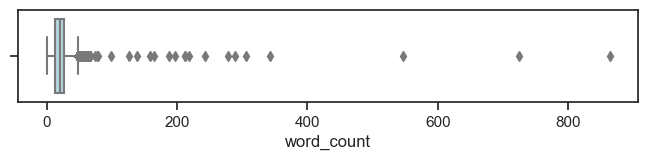

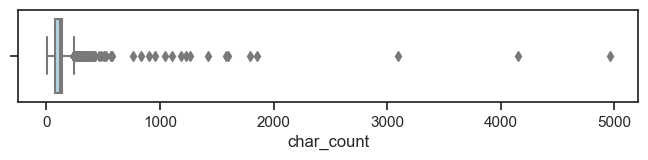

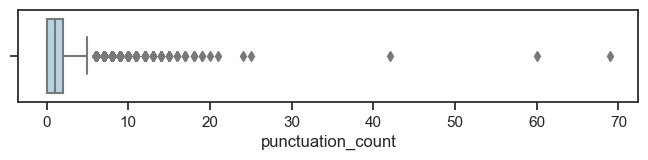

In [67]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_tweets['word_count'], color="lightblue")

plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_tweets['char_count'], color="lightblue")

plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_tweets['punctuation_count'], color="lightblue")

Average Features

/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='avg_sentence_length'>

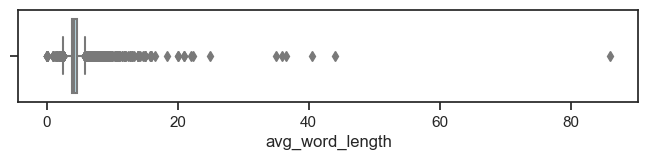

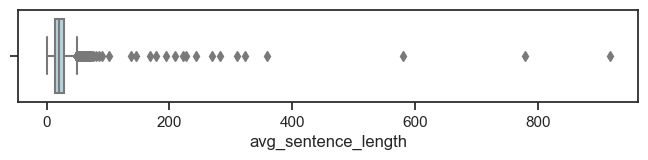

In [68]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_tweets['avg_word_length'], color="lightblue")

plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_tweets['avg_sentence_length'], color="lightblue")

### Quantile-Quantile (QQ-) plot

       word_count        var
56275           0  -1.552699
212             0  -1.552699
13327           0  -1.552699
145             0  -1.552699
63881           0  -1.552699
...           ...        ...
27353         306  19.732628
49003         343  22.306344
2708          547  36.496562
33935         725  48.878223
12520         864  58.547048

[64344 rows x 2 columns]


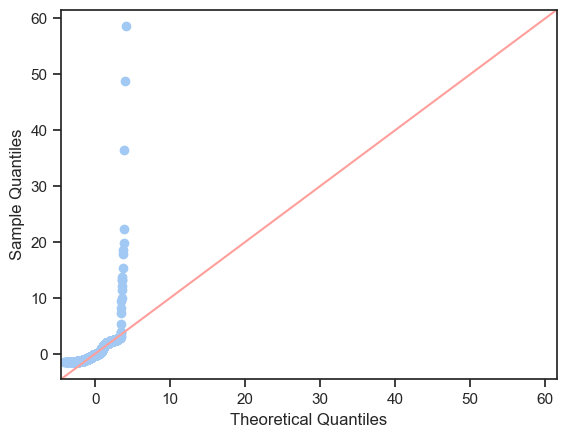

In [69]:
# Variable (standardized)
x = 'word_count'
df_qq = df_tweets
df_qq['var'] = (df_tweets[x]-df_tweets[x].mean()) / df_tweets[x].std()
print(df_qq.sort_values('var')[['word_count', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Piechart (matplotlib)

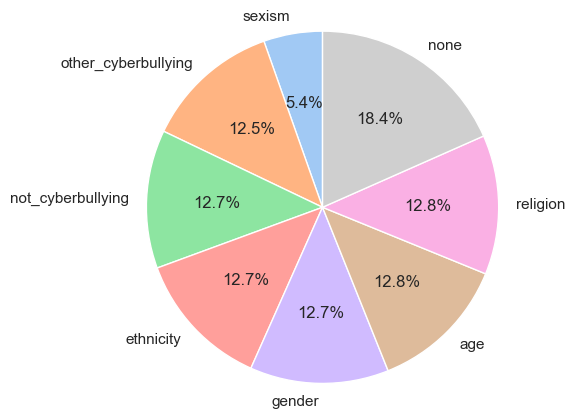

In [70]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df_tweets.cyberbullying_type.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

#### Users: How many Users sent messages

In [71]:
# Count the number of text messages per senderuser_id
message_counts = df_messages['senderuser_id'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=message_counts.index, y=message_counts.values, palette="viridis", order=message_counts.index)
plt.title('Number of Text Messages Sent by Senderuser_id')
plt.xlabel('Senderuser_id')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

NameError: name 'df_messages' is not defined

It is visible, that a lot of people send a lot of messages and lesser people write few messages.

# Graphical Multivariate EDA
Most Graphics like Scatterplots, Regressionlines, Matrices, Hexagonal binning plots or Correlation heatmaps don't make sense for the 0 or 1 features.

Also for the other features a comparation of the different Features don't give a value. For Example, the below scatterplot shows the correlation of word count and char count. But we can't really draw a further information out of it.

### Scatterplot

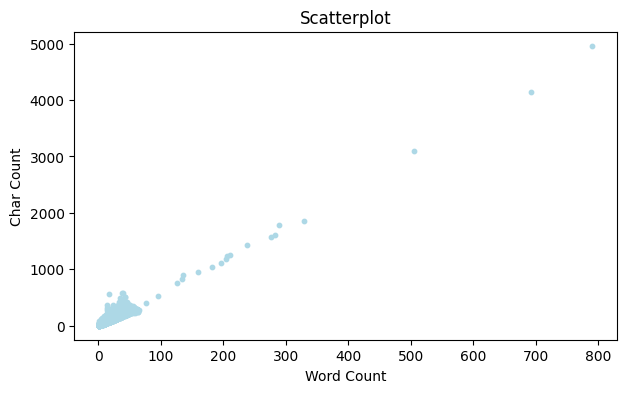

In [ ]:
plt.figure(figsize=(7,4))
plt.scatter(df_tweets['word_count'], 
           df_tweets['char_count'], 
           color="lightblue", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('Word Count')
plt.ylabel('Char Count')
plt.show()

### Scatterplot-matrix (seaborn)

/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

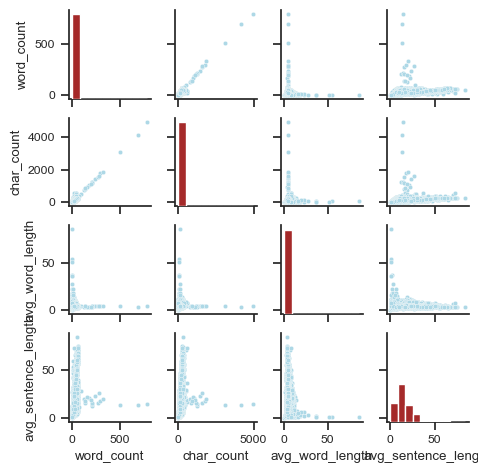

In [ ]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df_tweets[['word_count', 
                     'char_count', 
                     'avg_word_length', 
                     'avg_sentence_length']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='lightblue', s=10)
g.map_lower(sns.scatterplot, color='lightblue', s=10)
g.map_diag(plt.hist, color='brown')

### Correlation heatmap:

<Axes: >

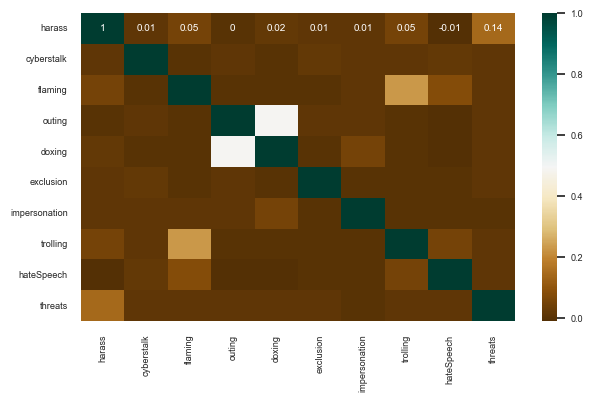

In [ ]:
# Set font size for plot
sns.set(font_scale=0.6)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)